In [2]:
import tensorflow as tf
import math
import numpy as np
import matplotlib.pyplot as plt


# import tqdm
# import tqdm.auto
# tqdm.tqdm = tqdm.auto.tqdm

# print(tf.__version__)

tf.compat.v1.enable_eager_execution()

In [3]:

(train_data, train_labels), (test_data, test_labels) = \
                      tf.keras.datasets.reuters.load_data(num_words=10000)
class_names = ['cocoa','grain','veg-oil','earn','acq','wheat','copper','housing','money-supply',
'coffee','sugar','trade','reserves','ship','cotton','carcass','crude','nat-gas',
'cpi','money-fx','interest','gnp','meal-feed','alum','oilseed','gold','tin',
'strategic-metal','livestock','retail','ipi','iron-steel','rubber','heat','jobs',
'lei','bop','zinc','orange','pet-chem','dlr','gas','silver','wpi','hog','lead']

2110848/2110848 [==============================] - 0s 0us/step


In [4]:
one_hot_train_labels = tf.keras.utils.to_categorical(train_labels)
one_hot_test_labels = tf.keras.utils.to_categorical(test_labels)

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(10000,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(46, activation='softmax')
])
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1. 
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/10
63/63 [==============================] - 5s 10ms/step - loss: 1.8990 - acc: 0.6077 - val_loss: 1.2620 - val_acc: 0.7190
Epoch 2/10
63/63 [==============================] - 0s 6ms/step - loss: 1.0040 - acc: 0.7779 - val_loss: 1.0366 - val_acc: 0.7810
Epoch 3/10
63/63 [==============================] - 0s 6ms/step - loss: 0.6957 - acc: 0.8436 - val_loss: 0.9208 - val_acc: 0.8090
Epoch 4/10
63/63 [==============================] - 0s 6ms/step - loss: 0.4940 - acc: 0.8944 - val_loss: 0.9230 - val_acc: 0.7910
Epoch 5/10
63/63 [==============================] - 0s 6ms/step - loss: 0.3564 - acc: 0.9251 - val_loss: 0.8399 - val_acc: 0.8240
Epoch 6/10
63/63 [==============================] - 0s 6ms/step - loss: 0.2788 - acc: 0.9395 - val_loss: 0.8818 - val_acc: 0.8180
Epoch 7/10
63/63 [==============================] - 0s 7ms/step - loss: 0.2280 - acc: 0.9446 - val_loss: 0.8859 - val_acc: 0.8150
Epoch 8/10
63/63 [==============================] - 0s 6ms/step - loss: 0.1981 - acc: 0.9

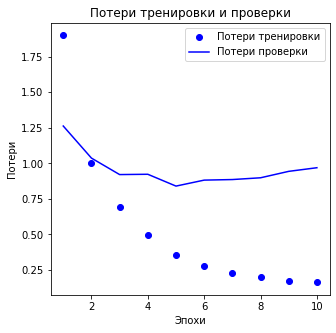

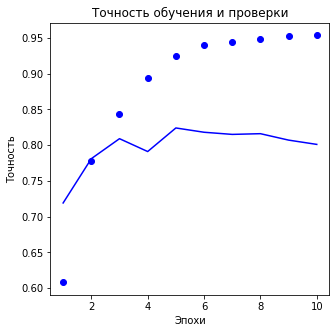

In [6]:
# График потерь
# plt.subplot(1, 2, 1)
plt.figure(figsize = (5, 5))

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Потери тренировки')
plt.plot(epochs, val_loss, 'b', label='Потери проверки')
plt.title('Потери тренировки и проверки')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()

# График точноти
# plt.subplot(1, 2, 2)
plt.figure(figsize = (5, 5))

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Точность тренировки')
plt.plot(epochs, val_acc, 'b', label='Точность проверки')
plt.title('Точность обучения и проверки')
plt.xlabel('Эпохи')
plt.ylabel('Точность')

plt.show()

In [7]:
results = model.evaluate(x_test, one_hot_test_labels)


71/71 [==============================] - 0s 3ms/step - loss: 1.1268 - acc: 0.7823


In [8]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [9]:
print(predictions[0])
print(np.argmax(predictions[0]))

[8.13785755e-06 1.82908683e-04 1.12022542e-08 8.73046875e-01
 1.24100767e-01 4.72212434e-07 3.29852234e-08 1.13671138e-06
 1.42148777e-03 3.48121517e-07 1.69325475e-07 1.32485657e-04
 1.91742893e-05 6.75328993e-05 1.24879989e-06 4.53722038e-08
 6.55789452e-04 3.98165457e-06 3.07805038e-07 1.81074691e-04
 1.06645239e-04 3.66907625e-06 3.63267461e-08 1.00051438e-05
 1.41361824e-07 1.32347509e-06 2.87317103e-09 1.14452966e-07
 9.48075581e-07 1.34233933e-05 4.58387689e-07 1.43692273e-06
 4.61806877e-08 1.97266399e-08 1.01490016e-08 1.02399567e-09
 1.58957846e-05 5.56674991e-07 5.75281796e-08 2.07304311e-05
 1.31036337e-08 3.36851855e-07 1.25640042e-07 3.56247369e-08
 1.28801159e-09 5.86575624e-08]
3


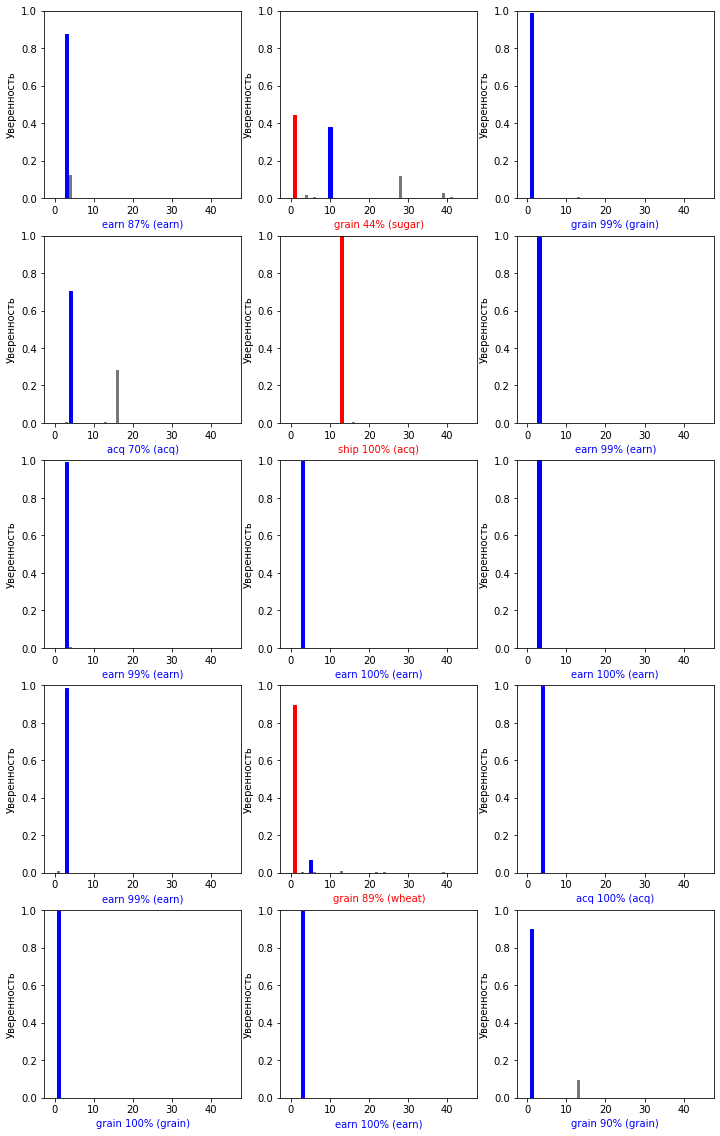

In [12]:
def plot_value_array(i, predictions_array, true_label):

    plt.grid(False)
    thisplot = plt.bar(range(46), predictions_array[i], color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array[i])

    thisplot[predicted_label].set_color('red')
    thisplot[true_label[i]].set_color('blue')
    if predicted_label == true_label[i]:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100 * np.max(predictions_array[i]),
                                        class_names[true_label[i]]),
                                        color=color)
    plt.ylabel('Уверенность')

num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(4*num_cols, 4*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plot_value_array(i, predictions, test_labels)